In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from htorch import layers

In [15]:
device = torch.device('cuda:3')

data = torch.tensor(pd.read_csv("mnist_train.csv", header=None).values)
x, y = (data[:, 1:]/255).float().to(device), torch.nn.functional.one_hot(data[:, 0].long(), 10).to(device)

test = torch.tensor(pd.read_csv("mnist_test.csv", header=None).values)
x_test, y_test = (test[:, 1:]/255).float().to(device), torch.nn.functional.one_hot(test[:, 0].long(), 10).to(device)

In [16]:
class Quat(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = layers.QLinear(196, 75)
        self.fc2 = layers.QLinear(75, 25)
        self.fc3 = nn.Linear(100, 10)

    def forward(self, x):
        # x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
model = Quat()
model.to(device)
optimiser = torch.optim.Adam(model.parameters(), lr=1.2e-3)
losses = []
trainacc = []
testacc =[]

/home/aritra/project/quartLT23/pytorch_with_mnist/htorch/quaternion.py:491: UserWarning: Defining your `__torch_function__` as a plain method is deprecated and will be an error in future, please define it as a classmethod. (Triggered internally at ../torch/csrc/utils/python_arg_parser.cpp:350.)
  if self.dim() == 1:
/home/aritra/project/quartLT23/pytorch_with_mnist/htorch/quaternion.py:494: UserWarning: Defining your `__torch_function__` as a plain method is deprecated and will be an error in future, please define it as a classmethod. (Triggered internally at ../torch/csrc/utils/python_arg_parser.cpp:350.)
  out = self.q[:, :self.shape[1] // 4]
/home/aritra/project/quartLT23/pytorch_with_mnist/htorch/quaternion.py:500: UserWarning: Defining your `__torch_function__` as a plain method is deprecated and will be an error in future, please define it as a classmethod. (Triggered internally at ../torch/csrc/utils/python_arg_parser.cpp:350.)
  if self.dim() == 1:
/home/aritra/project/quartLT2

100%|██████████| 80/80 [05:10<00:00,  3.89s/it]


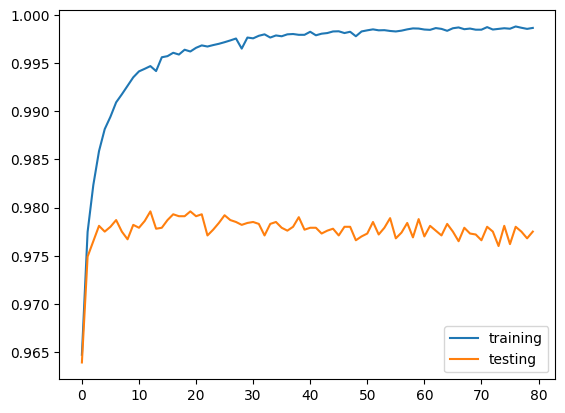

In [17]:
for epoch in tqdm(range(80)):
    batch_size = 60
    for i in range(0, len(x), batch_size):
        batch_x, batch_y = x[i:i+batch_size], y[i:i+batch_size].float()
        optimiser.zero_grad()
        output = model(batch_x)
        loss = F.mse_loss(output, batch_y)
        loss.backward()
        optimiser.step()
    losses.append(loss.item())
    
    accuracy = (model(x).argmax(1) == y.argmax(1)).sum().item()/len(x)
    trainacc.append(accuracy)
    # print(f"Training Accuracy: {accuracy*100:.2f}%")

    accuracy = (model(x_test).argmax(1) == y_test.argmax(1)).sum().item()/len(x_test)
    # print(f"Testing Accuracy: {accuracy*100:.2f}%")
    testacc.append(accuracy)

plt.plot(range(len(trainacc)), trainacc, label='training')
plt.plot(range(len(testacc)), testacc,label = 'testing')
plt.legend()